# 8. Clustering Report

## Jordi Blasco Lozano

En este report veremos cuales son las funciones de cada uno de los ejercicios implementados en la practica, además de analizar con detalle los resultados obtenidos en cada apartado. 

## Ejercicio 1: datos sintéticos

En este ejercicio generaremos todos los datos sinticos que nos serviran más adelante para realizar el `Deterministic Annealing`. Para ello generaremos puntos sobre un espacio 2D siguiendo la distribucion gaussiana. 

Tal como podemos observar en la imagen siguiente, que corresponde a un cluster de 100 puntos que sigue una distribucion gaussiana. La distribucion gaussiana logra concentrar la mayoría de los puntos cerca de un centro, haciendo que la densidad disminuya suavemente hacia los bordes. Esto da como resultado una forma similar a una nube con bordes difusos.

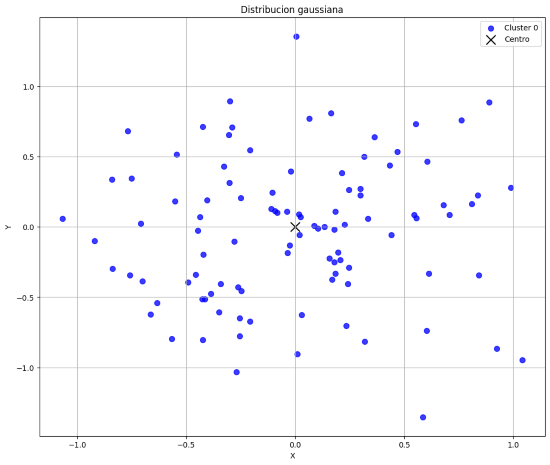

Generar varios clusters de puntos sinteticos nos servira a posteriori para probar nuestro algoritmo de `Deterministic Annealing`

![3clusters.png](output.png)
![5clusters.png](output2.png)

## Ejercicio 2 y 3: implementación del algoritmo Deterministic Annealing

En este ejercicio utilizaremos los datos sintéticos generados anteriormente con 3 y 5 clústeres para aplicar el algoritmo de agrupamiento `Deterministic Annealing`, utilizando como criterio las **distancias euclidianas** entre los puntos. Este algoritmo permite identificar estructuras de agrupación de forma progresiva, comenzando con una asignación difusa de los datos, que se vuelve más definida a medida que se reduce la temperatura del sistema. Este proceso evita decisiones prematuras o agrupaciones subóptimas y nos permite obtener resultados más estables y representativos de la verdadera estructura de los datos.

Comenzaremos con algunos ejemplos básicos del testeo

- **Test Case 3**: 5 clústeres originales, el algoritmo busca 5 clústeres  
- **Test Case 1**: 3 clústeres originales, el algoritmo busca 6 clústeres  
- **Test Case 5**: 5 clústeres originales, el algoritmo busca 10 clústeres

En el primer caso, observamos cómo el algoritmo logra una asignación muy similar a la de los clústeres originales, conservando la estructura inicial casi intacta. En los dos siguientes ejemplos, donde el número de clústeres definidos por el algoritmo supera al número real, vemos que el algoritmo toma una decisión inteligente: **subdivide** algunos clústeres originales en partes más pequeñas, en función de la densidad o la forma interna de los datos. Esto ocurre porque, al reducir la temperatura, el algoritmo detecta estructuras internas que justifican una separación adicional dentro de los clústeres originales.


![caso3.png](caso3.png)
![caso5.png](caso5.png)


Por otro lado, también analizamos casos donde el número de clústeres definidos por el algoritmo es menor al número real:

- **Test Case 2**: 3 clústeres originales, el algoritmo busca 2 clústeres  
- **Test Case 4**: 5 clústeres originales, el algoritmo busca 2 clústeres


En el primer caso, al haber dos clústeres muy cercanos entre sí, el algoritmo decide agruparlos bajo una misma categoría, dejando el tercer clúster como una agrupación separada. En el segundo caso, con cinco clústeres originales, el algoritmo opta por dividir uno de los clústeres centrales en dos, mientras agrupa el resto bajo una sola categoría. Esta decisión se explica por la distribución espacial y la densidad relativa de los puntos, que hacen que el algoritmo identifique diferencias significativas dentro del clúster central, más allá de lo que sucede en los demás.


![caso2.png](caso2.png)
![caso4.png](caso4.png)

## Ejercicio 4 y 5: entropía y clusters optimos

En estos ejercicios exploraremos el concepto de entropía y cómo utilizarlo para determinar el número óptimo de clústeres en los dos conjuntos de datos gaussianos generados previamente.

La entropía mide el grado de incertidumbre o aleatoriedad en la asignación de los puntos a los clústeres. Una entropía alta indica una asignación poco definida (los puntos tienen probabilidades similares de pertenecer a varios clústeres), mientras que una entropía baja refleja agrupaciones más claras y definidas. Para cada número de clústeres probado, calculamos la entropía del sistema, y observamos cómo evoluciona.

El número óptimo de clústeres se identifica como aquel donde se produce una mayor disminución relativa de la entropía, es decir, el punto donde añadir más clústeres ya no reduce significativamente la incertidumbre. Este criterio evita tanto el sobreajuste (demasiados clústeres) como el subajuste (muy pocos clústeres).

Las gráficas generadas para ambos conjuntos de datos muestran cómo comenzamos con 2 clústeres, y la entropía es inicialmente alta (alrededor de 5.0 y 5.5, respectivamente). A medida que aumentamos el número de clústeres, la entropía va disminuyendo, ya que las asignaciones se vuelven más definidas. Esto ocurre porque el sistema se enfría y los puntos comienzan a identificarse más claramente con uno de los clústeres.



En la primera gráfica, observamos que la entropía desciende hasta alcanzar un valor estable cercano a 4 cuando se prueban 9 clústeres. Sin embargo, el algoritmo identifica 3 clústeres como número óptimo, ya que es ahí donde se produce la caída más significativa en la entropía relativa.


![grafica1.png](grafica1.png)


En cambio, en la segunda gráfica, la estabilización de la entropía ocurre más tarde. Esto se debe a que el conjunto de datos original contiene más clústeres, lo que retrasa el punto en el que las asignaciones dejan de aportar mejoras sustanciales. En este caso, el algoritmo también detecta un punto óptimo razonable antes de que la entropía se estabilice completamente.



![grafica2.png](grafica2.png)

## Ejercicio 6: aplicación real sobre imagenes

Este ejercicio representa uno de los más interesantes de la practica, ya que nos permite visualizar el potencial práctico del algoritmo de Deterministic Annealing en tareas reales y complejas como la segmentación de imágenes. Este tipo de técnica puede extrapolarse a múltiples áreas de aplicación como la medicina, la seguridad etc. 

#### Preparación de nuestro minion


Aunque el clustering es un algoritmo que trabaja sobre vectores en espacios n-dimensionales, una imagen digital es, en esencia, una matriz 3D de dimensiones (alto, ancho, canales), en nuestro caso la forma de la imagen original es de (425, 720, 3). Por tanto, para poder aplicar el algoritmo de clustering, es necesario aplanar la imagen y convertirla en una colección de vectores 3D (cada uno representando el color RGB de un píxel). Este proceso transforma la imagen en una matriz de forma (306000, 3).

Para este experimento visual he seleccionado deliberadamente una imagen con contrastes de color fuertes y áreas bien definidas, usando una ilustración de un Minion Superman. Esto nos permite observar fácilmente cómo el algoritmo reacciona ante bordes, sombras, reflejos y patrones de color.

He optado por usar un plot de (1,3) para mostrar las tres etapas para visualizar nuestra imagen segmentada con DA y su proceso.
1) **Imagen original** donde se observa claramente la silueta del personaje, los detalles del disfraz y los reflejos de luz en la lente del ojo.

2) **Imagen filtrada** que es el resultado de aplicar un filtro que reduce el ruido de alta frecuencia para facilitar la segmentación.

3) **Imagen segmentada** con DA procesada por el algoritmo Deterministic Annealing con 5 clústeres.


#### Resultados y observaciones sobre nuestro minion

La segmentación con 5 clústeres ofrece una representación simplificada de las diferentes regiones de color en la imagen, pero con una interpretación visual todavía coherente.

- Las zonas blancas de la lente y los reflejos faciales se han fusionado con el ojo, generando un clúster común. Esto se debe a la similitud cromática entre los reflejos y el blanco del ojo, lo que provoca que el algoritmo los agrupe como una misma región, ya que solo se basa en la información RGB.

- El símbolo de Superman no ha sido claramente segmentado. Esto ocurre porque la diferencia de color entre el logo y el traje no es tan marcada como otras regiones, y además su área es pequeña en comparación con el resto de la imagen. El algoritmo tiende a priorizar regiones con mayor densidad y tamaño, lo que provoca una pérdida de ese detalle.

- A pesar de la reducción de detalles, la forma general del Minion se mantiene claramente reconocible, lo que demuestra que incluso con una representación simplificada (solo 5 colores), el algoritmo es capaz de capturar la estructura esencial de la figura.

- Vemos como se pierden detalles finos, como los contornos del símbolo o las sombras suaves en la capa y el fondo. Esto es una limitación inherente al uso de un número bajo de clústeres, ya que obliga al modelo a generalizar más de lo deseado.

![minion.png](minion.png)

## Consideraciones Finales

Durante esta práctica hemos ido viendo poco a poco cómo funciona y cuál es el potencial del algoritmo de clustering de tipo Deterministic Annealing (DA). Comenzamos generando sets de datos sintéticos y terminamos aplicándolo en la segmentación real de una imagen con resultados interesantes.

En el primer ejercicio aprendimos a cómo crear puntos sintéticos distribuidos con una gaussiana, nos sirvió para entender un poco mejor cómo funcionan estos algoritmos. Poder visualizar estas distribuciones en 2D ayudó bastante a poder ver mejor la intención del Deterministic Annealing de forma que supiera diferenciar los clusters escondidos dentro de nuestros datos.

En el Ejercicio 3, probamos directamente nuestro algoritmo DA realizado en el ejercicio 2 sobre estos conjuntos sintéticos. Vimos cómo el algoritmo decidía inteligentemente dividir y juntar clústeres basándose en la propia distribución y densidad de los puntos.

Despues en los Ejercicios 4 y 5, aprendimos lo que es la entropía. La entropía nos sirvió para medir objetivamente cuándo agregar más clusters deja de aportar cosas útiles. De esta forma, pudimos encontrar el número óptimo evitando caer en extremos (ni poco, ni demasiado). Viendo las graficas queda muy claro visualmente se llega un punto donde añadir más clusters no mejora nada significativo.

Probablemente el ejercicio más interesante y práctico ha sido el último Ejercicio 6 sobre el algortimo DA usado para segmentar una imagen, en este caso, en mi caso use un minion con disfraz de Superman. Aprendí cómo preparar una imagen (que originalmente es una matriz 3D) para usarla como input del algoritmo, transformándola a un conjunto de píxeles representados en RGB.


### Aplicaciones reales del clustering: Medicina y Seguridad

Hacer esta última parte nos muestra qué tan útil es realmente este algoritmo. Dos de las aplicaciones prácticas más realistas para usar el clustering son en medicina y en seguridad.

#### Medicina

En medicina, segmentar imágenes automáticamente con clustering como el DA puede ser crucial porque ayuda mucho al diagnóstico rápido y preciso:

- Detección de tumores: Usando imágenes de resonancia puedes separar tejido sano del tejido raro (tumores o lesiones), especialmente útil porque no hace falta una supervisión tan estricta (menos trabajo para médicos expertos y mejores resultados en zonas difíciles).
- Planificación de cirugías: Segmentar zonas precisas antes de intervenir ayuda a que las operaciones sean menos invasivas y más seguras.

El Deterministic Annealing aquí aporta muchísimo, especialmente en situaciones ambiguas o difíciles, por ser robusto frente a datos abstractos o ruidosos. 


#### Seguridad y Videovigilancia

Igual importante resulta en seguridad:

- Vigilancia en carreteras: Poder detectar claramente objetos (vehículos, personas, o anomalías) automáticamente y en tiempo real.
- Control de accesos: Los escaneres de los aeropuertos utilizan segmentacion de clusters para poder distinguir cada tipo de material de mejor forma.


### Reflexión Final

En definitiva, esta práctica ha sido realmente útil no solo para entender el algoritmo, sino para ver el  potencial en proyectos y situaciones reales que puede llegar a tener esta tecnica. 

Aunque el ejemplo del Minion Superman pueda parecer simple, la técnica que hay detrás es exactamente la misma que podríamos usar para algo tan crítico como la detección temprana de tumores o para identificar situaciones peligrosas en cámaras de seguridad. Por esto, esta práctica resume muy bien por qué técnicas como el clustering determinista son una herramienta potente e importante para resolver problemas reales en ámbitos muy distintos.
